In [85]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Dense, Input, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
%matplotlib inline

## Load data

In [86]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [87]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Normalize input data

In [88]:
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

In [89]:
x_train.shape

(60000, 28, 28)

In [90]:
x_train = np.reshape(x_train, (60000,784))
x_test = np.reshape(x_test, (10000,784))

In [91]:
np.set_printoptions(threshold=784,linewidth=np.inf)

In [92]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.       

In [93]:
num_noise_tuning_value = 0.8

## adding noise to the data

In [95]:
x_train_noise = x_train + num_noise_tuning_value * np.random.rand(60000,784)
x_test_noise = x_test + num_noise_tuning_value * np.random.rand(10000,784)

In [96]:
x_train_noise

array([[0.77520913, 0.6794143 , 0.38890279, ..., 0.65702445, 0.13395469, 0.61443987],
       [0.45128932, 0.53729512, 0.59120715, ..., 0.67658844, 0.71097229, 0.42192474],
       [0.72252983, 0.04520146, 0.07465579, ..., 0.04294298, 0.61141229, 0.25458274],
       ...,
       [0.77590222, 0.24818678, 0.16640192, ..., 0.79972252, 0.57690285, 0.68081989],
       [0.3875698 , 0.61161017, 0.35467532, ..., 0.17063251, 0.60964356, 0.29091525],
       [0.45598716, 0.46913874, 0.79849954, ..., 0.79072584, 0.60431689, 0.20216549]])

## image 확인

In [97]:
def plot(x,p,labels = False):
    plt.figure(figsize = (20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28),cmap = 'binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()

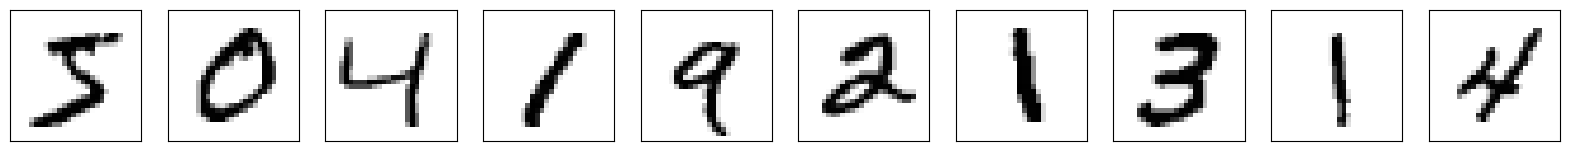

In [98]:
plot(x_train,None)

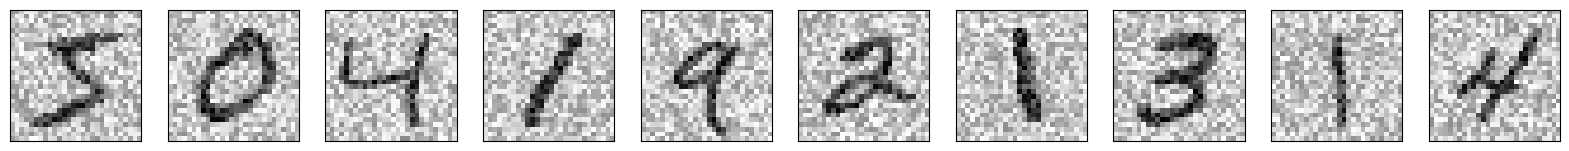

In [99]:
plot(x_train_noise, None)

In [100]:
input_image = Input(shape=(28,28))

In [101]:
input_image

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_16')>

## make auto encoder model

In [102]:
input_image = Input(shape=(784,))

# 64*1 dimensional space is called the bottleneck
encoder = Dense(64, activation = 'relu')(input_image)
decoder = Dense(784, activation = 'sigmoid')(encoder)

autoencoder = Model(input_image, decoder)
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [103]:
autoencoder.fit(x_train_noise, x_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1523
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1035
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0976
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0960
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0953


In [104]:
predict = autoencoder.predict(x_test_noise)

313/313 [==============================] - 0s 699us/step


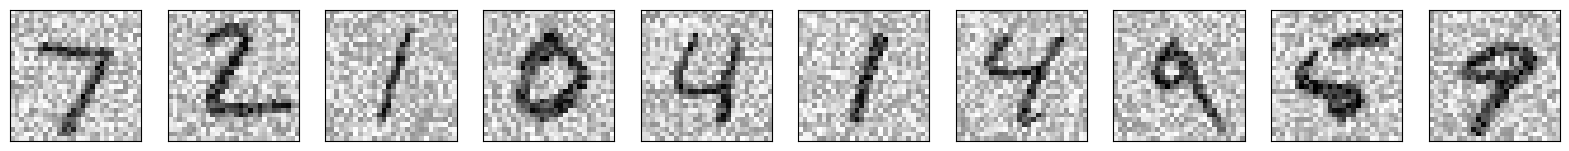

In [105]:
plot(x_test_noise, None)

In [106]:
x_test_noise

array([[0.02948568, 0.34078794, 0.5995329 , ..., 0.34685266, 0.62947055, 0.46461727],
       [0.05462794, 0.24696485, 0.09750062, ..., 0.43706976, 0.5244382 , 0.07273058],
       [0.60684837, 0.79740918, 0.75142353, ..., 0.50911928, 0.29679665, 0.26541183],
       ...,
       [0.7146818 , 0.30197973, 0.64714434, ..., 0.27659529, 0.79779483, 0.14828884],
       [0.00670098, 0.00338446, 0.17936679, ..., 0.52156186, 0.00452054, 0.06727911],
       [0.6878777 , 0.01946445, 0.69280558, ..., 0.04292841, 0.3159357 , 0.35520691]])

In [107]:
len(predict)

10000

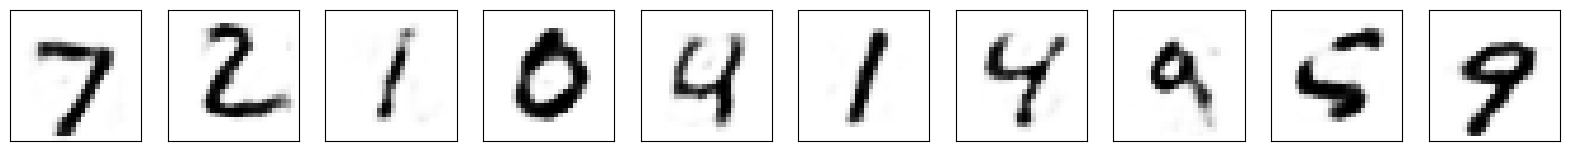

In [108]:
plot(predict, None)